In [1]:
import pandas as pd
import numpy as np
import os

### concat all data in one

In [3]:
files = [file for file in os.listdir('/Users/vivekdahal/Documents/DS/pandata/SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('/Users/vivekdahal/Documents/DS/pandata/SalesAnalysis/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.head()

all_months_data.to_csv('allData.csv',index=False)

In [4]:
# read new concatenated data
all_data = pd.read_csv('allData.csv')
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
186849,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


## clean data

#### drop rows of nan

In [7]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data=all_data.dropna(how='all')
all_data.tail()
 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
186849,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


#### find 'Or' and delete it

In [9]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
# now remove data with 'Or'
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### make columns the correct datatype

In [12]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] =  pd.to_numeric(all_data['Price Each'])
# int vs to_numeric = int has no decimal 

### Augument data with additional columns

####  Add month column

In [15]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### add Sales column


In [17]:
all_data['Sales']= all_data['Quantity Ordered']* all_data['Price Each'] 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Q1. What was the best month for sales? How much was earned that month?

In [19]:
a = all_data.groupby('Month').sum('Sales')
a

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [20]:
a.max()

Quantity Ordered      28114.00
Price Each          4588415.41
Sales               4613443.34
dtype: float64

In [21]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Best Month for Sales')

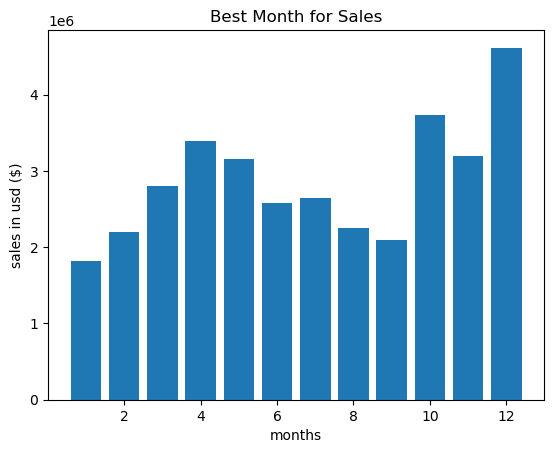

In [22]:
months = range(1,13)
plt.bar(months, a.Sales) 
plt.xlabel('months')
plt.ylabel('sales in usd ($)')
plt.title('Best Month for Sales')
# 1e6 = 10^6 = 1 mil


 ### Q2. What city had the highest number of sales?

In [24]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95
186849,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301",6,2.99


In [25]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_data['City']= all_data['Purchase Address'].apply(lambda x: get_city(x)+ ' ' + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


In [26]:
b=all_data.groupby('City').sum('Sales')

b

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


In [27]:
b.max()

Quantity Ordered      50239.00
Price Each          8211461.74
Month                315520.00
Sales               8262203.91
dtype: float64

Text(0.5, 1.0, 'Sales per City')

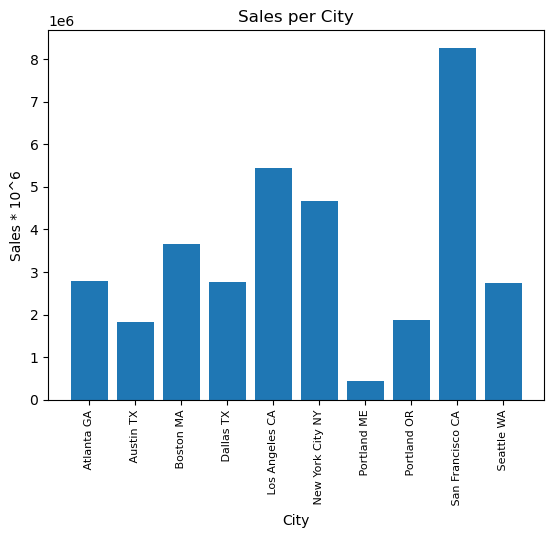

In [28]:
plt.bar(b.index, b['Sales'])
plt.xticks(b.index , rotation= 'vertical' , size=8)
plt.xlabel('City')
plt.ylabel('Sales * 10^6')
plt.title('Sales per City')

### Q3. What time to display adverts to maximize likelihood of customers buying product?

In [30]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

/var/folders/rm/chq1zyxd0915d6m6tslpc4100000gn/T/ipykernel_89781/3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [31]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


In [32]:
# extracting hour by first converting order date to datetime format
all_data['Hour']= all_data['Order Date'].dt.hour    
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12


In [98]:
# on the basis of total sales
c = all_data.groupby('Hour').sum('Sales')
c

,Quantity Ordered,Price Each,Month,Sales
Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


In [34]:
#on the basis of quantity ordered 
d = all_data.groupby('Hour').sum('Quantity Ordered')


Text(0.5, 1.0, 'Quantity Basis')

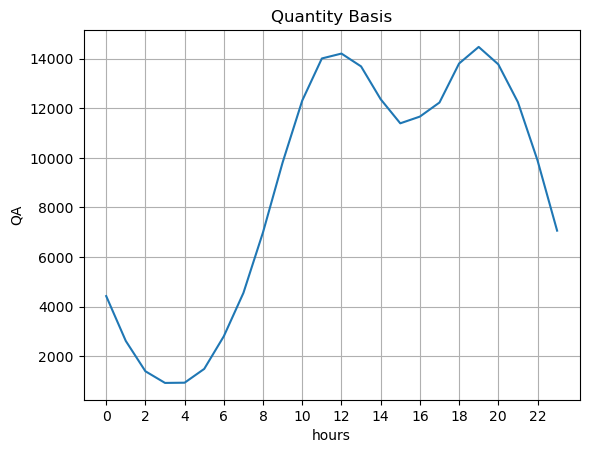

In [35]:
plt.plot(d.index,d['Quantity Ordered'])
plt.xticks(range(0,24,2))
plt.xlabel('hours')
plt.ylabel('QA')
plt.grid()
plt.title('Quantity Basis')

Text(0.5, 1.0, 'Sales Basis')

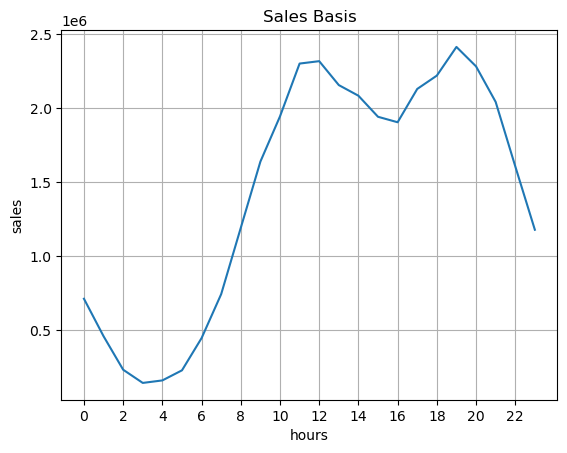

In [36]:
plt.plot(c.index,c.Sales)
plt.xticks(range(0,24,2))
plt.xlabel('hours')
plt.ylabel('sales')
plt.grid()
plt.title('Sales Basis')

### answer: my recommendation is around 11am and 7pm

## Q4. What products are most often sold together?

In [39]:
df = all_data[all_data['Order ID'].duplicated(keep=False)] 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston MA,12
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston MA,12
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston MA,12
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston MA,12
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City NY,14


In [40]:
import pandas as pd
pd.set_option('display.max_colwidth', None)     #all data display without '....'
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))
df.head()

/var/folders/rm/chq1zyxd0915d6m6tslpc4100000gn/T/ipykernel_89781/2419619527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSport Headphones,Wired Headphones"
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSport Headphones,Wired Headphones"
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSport Headphones,Wired Headphones"
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSport Headphones,Wired Headphones"
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City NY,14,"Vareebadd Phone,USB-C Charging Cable"


In [41]:
df = df[['Order ID' , 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSport Headphones,Wired Headphones"
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [42]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))


count.most_common(10)
    
    

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Q5. What product sold the most and why do you think it did?

In [44]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12


In [45]:
dfa=all_data.groupby('Product').sum('Quantity Ordered')

In [46]:

maxrow=dfa.loc[dfa['Quantity Ordered'].idxmax()]  #index max 
maxrow

Quantity Ordered     31017.00
Price Each           61716.59
Month               146370.00
Sales                92740.83
Hour                297332.00
Name: AAA Batteries (4-pack), dtype: float64

In [104]:
z = all_data.groupby('Product')['Quantity Ordered'].sum()
print(z)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


In [167]:
z.count()

19

([<matplotlib.axis.XTick at 0x166668350>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

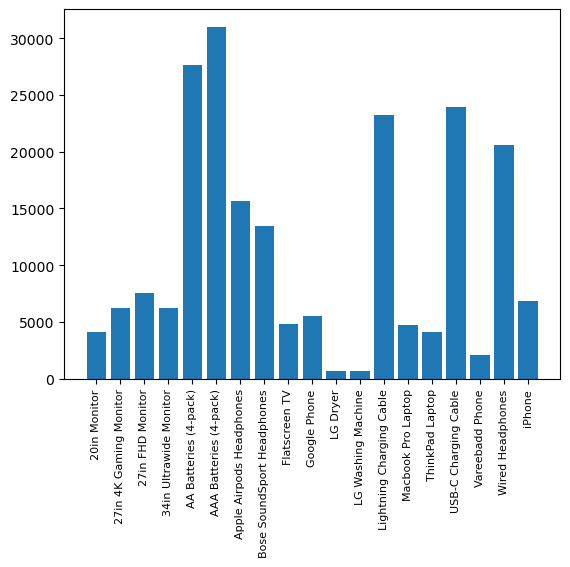

In [120]:
import matplotlib.pyplot as plt
plt.bar(z.index,z.values)
plt.xticks(z.index , rotation= 'vertical' , size=8)


### Q6. How many unique products?

In [157]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12


In [175]:
qw = all_data.groupby('Product')['Sales'].sum()
qw.count()


19

Ans: 19 unique products